# Tutorial Machine Learning: Logistic Regression

Selamat datang di tutorial tentang Logistic Regression! Tutorial ini akan membahas salah satu algoritma klasifikasi yang paling fundamental dalam machine learning.

## Daftar Isi:
1. Pengenalan Logistic Regression
   - Apa itu Logistic Regression?
   - Perbedaan dengan Linear Regression
   - Kapan menggunakan Logistic Regression?
2. Konsep Matematika
   - Sigmoid Function
   - Maximum Likelihood Estimation
   - Gradient Descent
3. Implementasi dengan Python
   - Binary Classification
   - Multiclass Classification
4. Evaluasi Model
   - Confusion Matrix
   - ROC Curve dan AUC
   - Classification Metrics
5. Studi Kasus
6. Latihan

Mari kita mulai!

## 1. Pengenalan Logistic Regression

### Apa itu Logistic Regression?
Logistic Regression adalah algoritma machine learning yang digunakan untuk masalah klasifikasi. Meskipun namanya mengandung kata "regression", algoritma ini sebenarnya digunakan untuk prediksi kelas atau kategori.

### Perbedaan dengan Linear Regression:
1. **Output**:
   - Linear Regression: nilai kontinyu (numerik)
   - Logistic Regression: probabilitas (0-1) yang dikonversi ke kelas

2. **Fungsi**:
   - Linear Regression: \[ y = wx + b \]
   - Logistic Regression: \[ P(y=1) = \frac{1}{1 + e^{-(wx + b)}} \]

### Kapan Menggunakan Logistic Regression?
1. Untuk masalah klasifikasi biner
2. Ketika membutuhkan probabilitas sebagai output
3. Ketika data dapat dipisahkan secara linear
4. Ketika interpretabilitas model penting

Mari kita implementasikan konsep ini dengan Python:

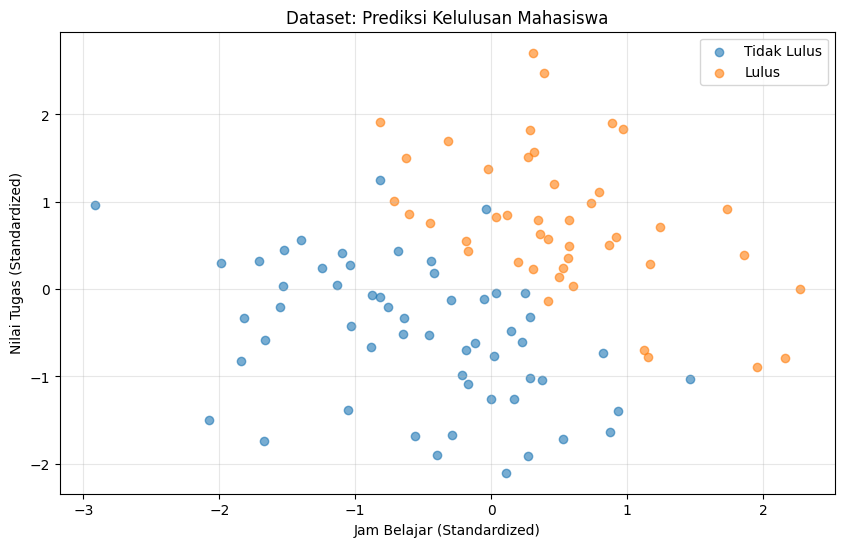

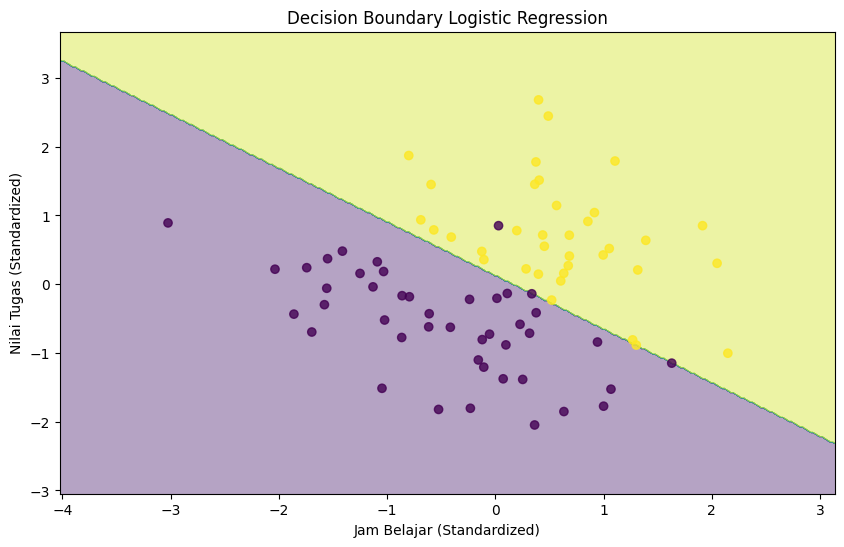

Evaluasi Model:
--------------------------------------------------

Confusion Matrix:
[[11  1]
 [ 0  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



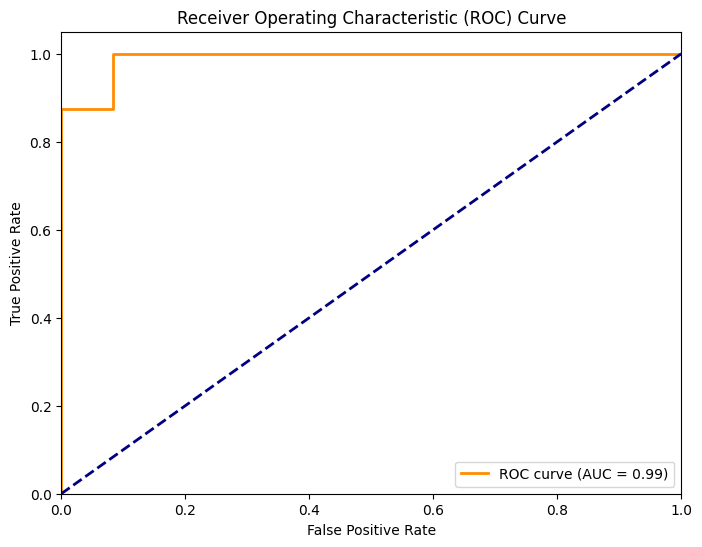

In [1]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler

# Set random seed untuk reproduktifitas
np.random.seed(42)

# Membuat dataset contoh untuk klasifikasi
# Misalkan: Prediksi kelulusan mahasiswa berdasarkan jam belajar dan nilai tugas
n_samples = 100

# Generate data untuk dua fitur
X = np.random.randn(n_samples, 2)
# Buat decision boundary linear
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Tambahkan sedikit noise
X = X + np.random.randn(n_samples, 2) * 0.3

# Buat DataFrame
df = pd.DataFrame(X, columns=['Jam_Belajar', 'Nilai_Tugas'])
df['Lulus'] = y

# Visualisasi data
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Lulus']==0]['Jam_Belajar'], 
           df[df['Lulus']==0]['Nilai_Tugas'], 
           label='Tidak Lulus', alpha=0.6)
plt.scatter(df[df['Lulus']==1]['Jam_Belajar'], 
           df[df['Lulus']==1]['Nilai_Tugas'], 
           label='Lulus', alpha=0.6)
plt.xlabel('Jam Belajar (Standardized)')
plt.ylabel('Nilai Tugas (Standardized)')
plt.title('Dataset: Prediksi Kelulusan Mahasiswa')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Split data dan standardisasi
X = df[['Jam_Belajar', 'Nilai_Tugas']]
y = df['Lulus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Buat dan latih model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Buat prediksi
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# Visualisasi decision boundary
def plot_decision_boundary(X, y, model, scaler):
    h = 0.02  # step size in the mesh
    
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    # Make predictions on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel('Jam Belajar (Standardized)')
    plt.ylabel('Nilai Tugas (Standardized)')
    plt.title('Decision Boundary Logistic Regression')
    plt.show()

# Plot decision boundary
plot_decision_boundary(X_train_scaled, y_train, model, scaler)

# Evaluasi model
print("Evaluasi Model:")
print("-" * 50)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 2. Konsep Matematika

### Sigmoid Function
Logistic Regression menggunakan fungsi sigmoid untuk mengubah output linear menjadi probabilitas:

\[ \sigma(z) = \frac{1}{1 + e^{-z}} \]

dimana \( z = wx + b \)

### Cost Function
Untuk Logistic Regression, kita menggunakan Binary Cross-Entropy Loss:

\[ J(\theta) = -\frac{1}{m} \sum_{i=1}^m [y_i \log(h_\theta(x_i)) + (1-y_i) \log(1-h_\theta(x_i))] \]

### Gradient Descent
Update parameter menggunakan:

\[ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) \]

Mari kita implementasikan sigmoid function dan visualisasikan bagaimana ia bekerja:

## 3. Multiclass Classification

Logistic Regression dapat diperluas untuk masalah klasifikasi multi-kelas menggunakan dua pendekatan:

1. **One-vs-Rest (OvR)**
   - Membuat classifier terpisah untuk setiap kelas
   - Membandingkan satu kelas dengan semua kelas lainnya
   - Default di scikit-learn

2. **Multinomial Logistic Regression**
   - Menggunakan fungsi softmax alih-alih sigmoid
   - Menghitung probabilitas untuk semua kelas sekaligus
   - Dikenal juga sebagai 'multinomial' di scikit-learn

Mari kita implementasikan contoh multiclass classification:

## 4. Regularization in Logistic Regression

Regularization adalah teknik untuk mencegah overfitting dalam Logistic Regression. Ada dua jenis regularization yang umum:

1. **L1 Regularization (Lasso)**
   - Menambahkan term \( \lambda \sum_{j=1}^n |\theta_j| \) ke cost function
   - Cenderung menghasilkan sparse model
   - Berguna untuk feature selection

2. **L2 Regularization (Ridge)**
   - Menambahkan term \( \lambda \sum_{j=1}^n \theta_j^2 \) ke cost function
   - Mencegah koefisien menjadi terlalu besar
   - Default di scikit-learn

3. **Elastic Net**
   - Kombinasi L1 dan L2 regularization
   - Menyeimbangkan kelebihan kedua metode

Mari kita bandingkan performa berbagai jenis regularization:

## 5. Latihan

Gunakan dataset yang telah kita buat untuk menyelesaikan soal-soal berikut:

1. Implementasikan Logistic Regression dari awal (tanpa sklearn):
   - Implementasi sigmoid function
   - Implementasi cost function
   - Implementasi gradient descent
   - Bandingkan hasil dengan sklearn

2. Eksperimen dengan berbagai parameter regularization:
   - Implementasikan cross-validation
   - Cari parameter optimal
   - Visualisasikan pengaruh regularization

3. Terapkan Logistic Regression pada dataset real:
   - Load dataset dari sklearn.datasets
   - Lakukan preprocessing yang sesuai
   - Implementasikan pipeline lengkap

4. Implementasikan multiclass classification:
   - Bandingkan OvR dan Multinomial
   - Evaluasi menggunakan berbagai metrics
   - Visualisasikan confusion matrix

5. Feature Engineering untuk Logistic Regression:
   - Implementasikan polynomial features
   - Lakukan feature selection
   - Evaluasi pengaruh terhadap performa

Berikut adalah template kode untuk latihan:

In [2]:
# Template untuk latihan

# Soal 1: Implementasi Manual Logistic Regression
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        
    def sigmoid(self, z):
        # Lengkapi kode di sini...
        pass
    
    def fit(self, X, y):
        # Lengkapi kode di sini...
        pass
    
    def predict(self, X):
        # Lengkapi kode di sini...
        pass

# Soal 2: Eksperimen Regularization
from sklearn.model_selection import GridSearchCV
def find_optimal_regularization(X, y):
    # Lengkapi kode di sini...
    pass

# Soal 3: Aplikasi pada Dataset Real
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
def apply_to_real_dataset():
    # Lengkapi kode di sini...
    pass

# Soal 4: Multiclass Classification
from sklearn.datasets import load_iris
def compare_multiclass_methods():
    # Lengkapi kode di sini...
    pass

# Soal 5: Feature Engineering
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest
def engineer_features(X, y):
    # Lengkapi kode di sini...
    pass

# Jalankan fungsi-fungsi di atas
# custom_model = CustomLogisticRegression()
# optimal_params = find_optimal_regularization(X, y)
# real_dataset_results = apply_to_real_dataset()
# multiclass_comparison = compare_multiclass_methods()
# engineered_features = engineer_features(X, y)